## Support Vector Machines

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

### Linear SVM Classification
A support vector machine constructs a hyperplane or set of hyperplanes in a high or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection.Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class.

Any hyperplane can be written as the set of points x satisfying
$$ w^Tx - b = 0 ,$$




<div>
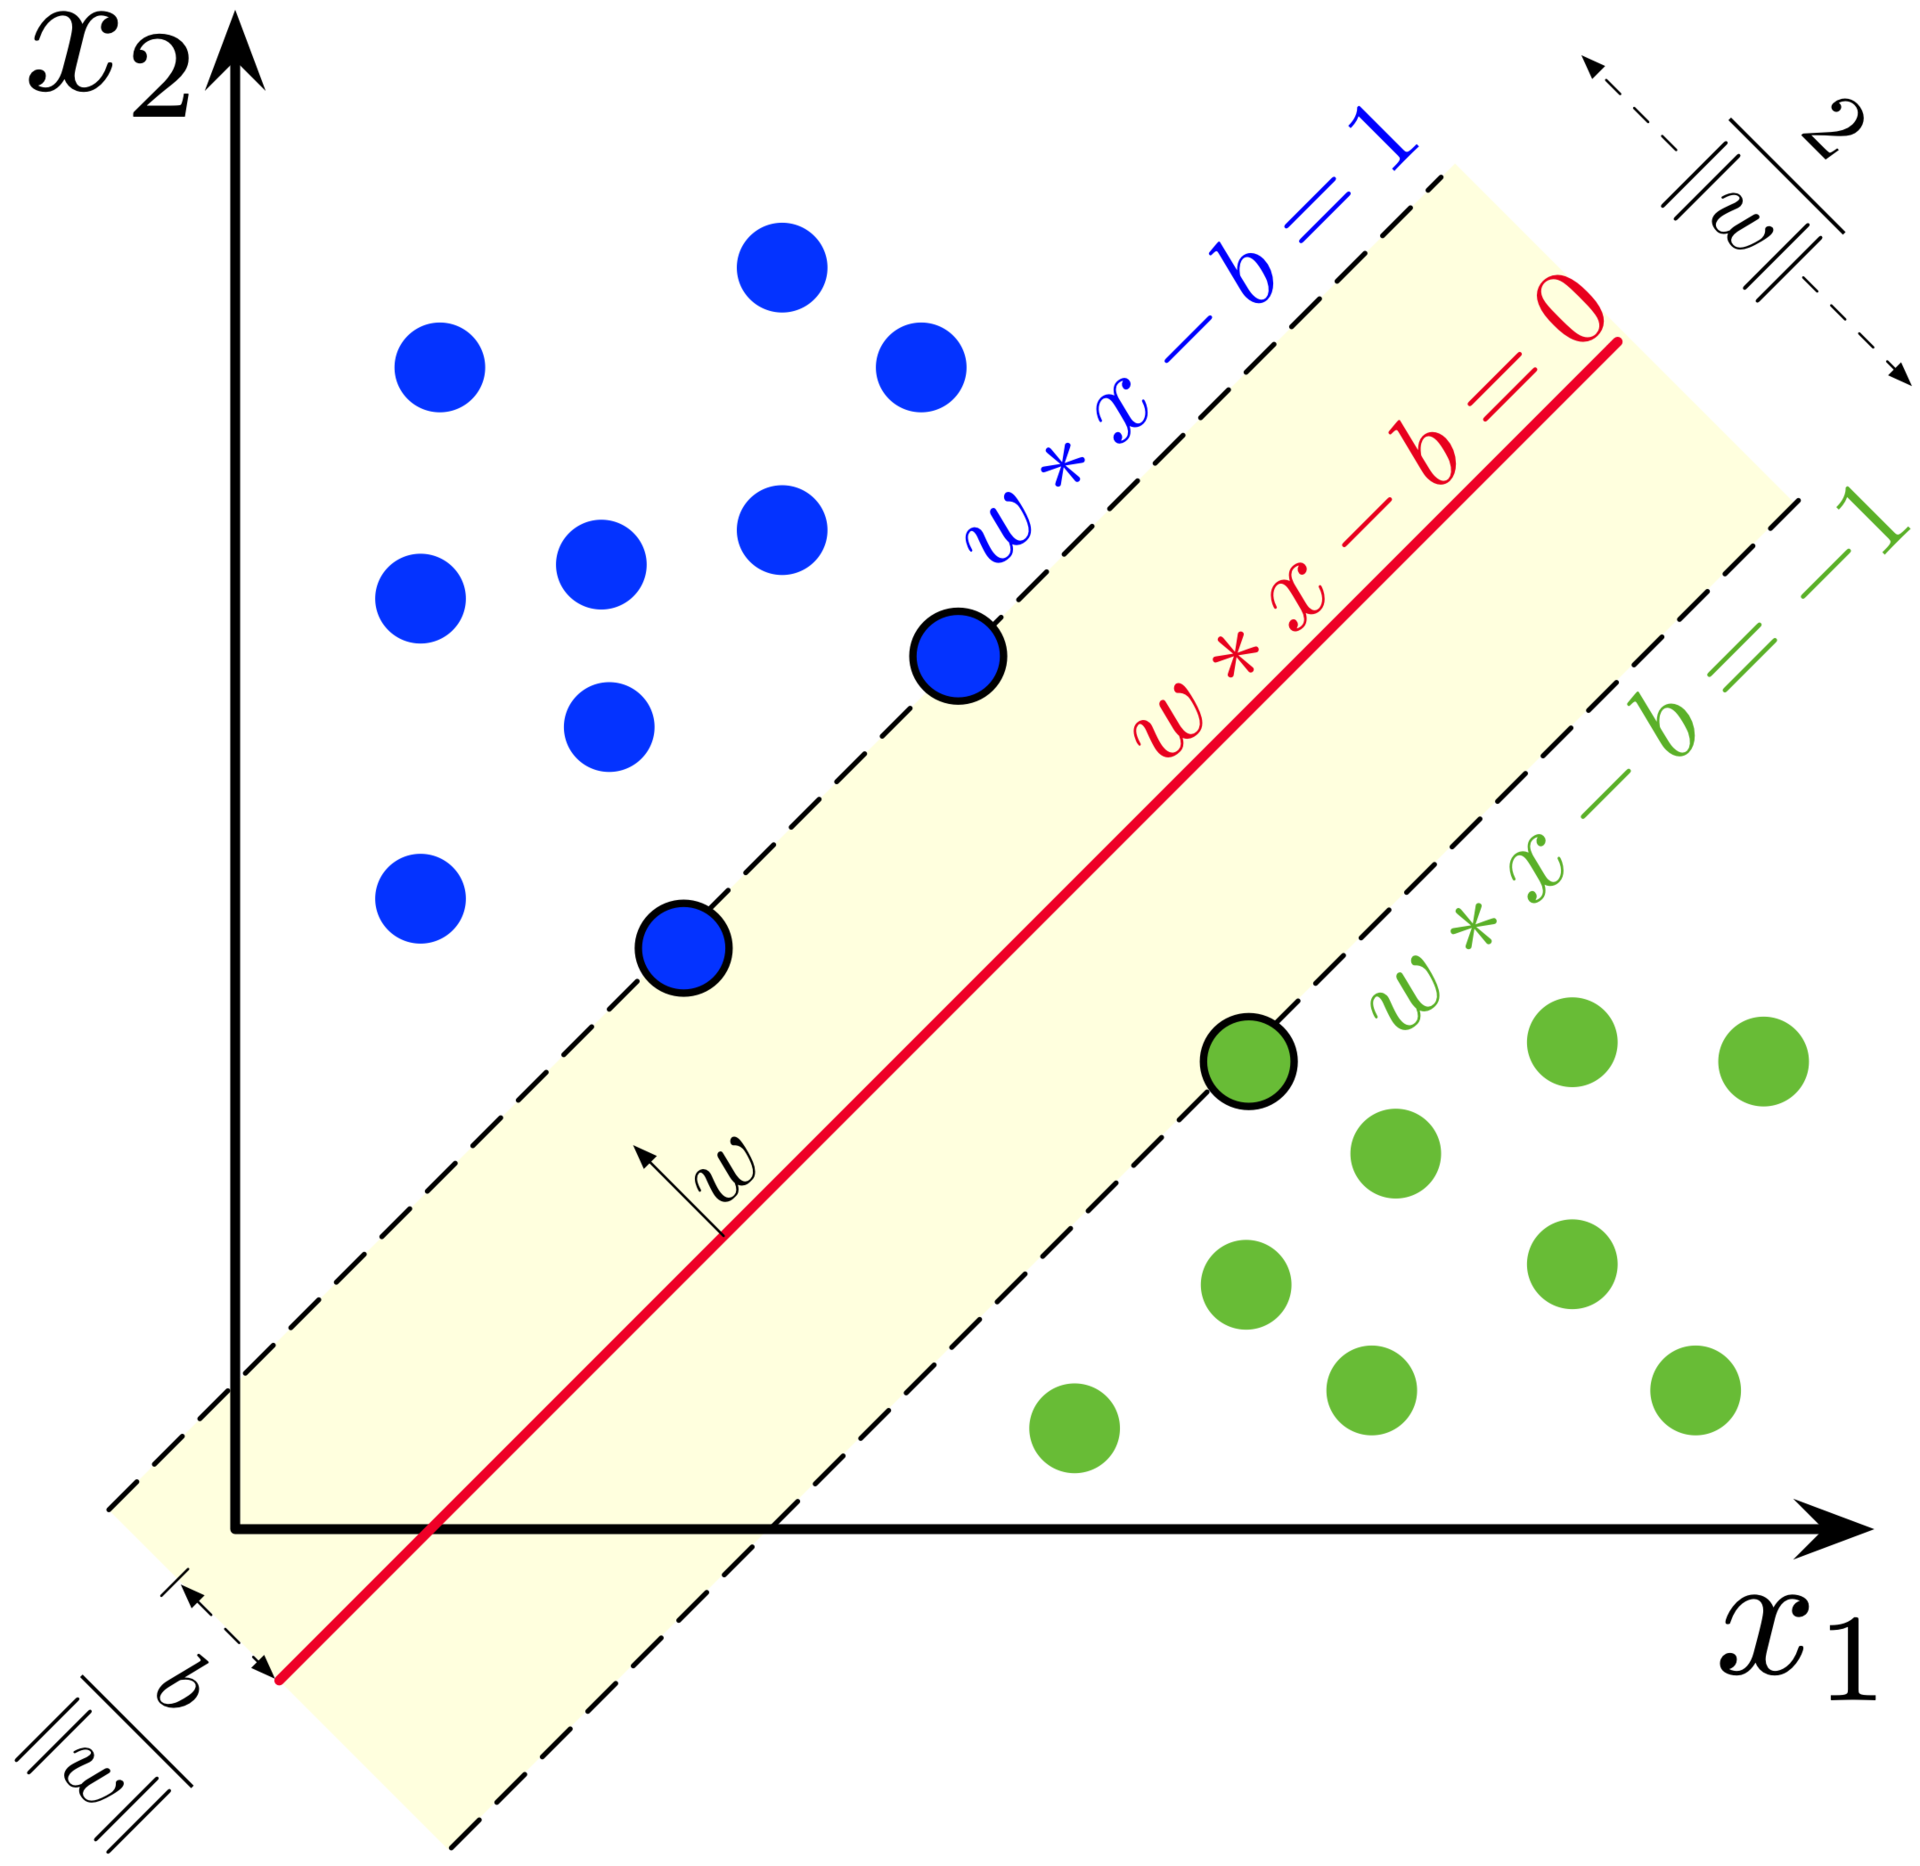
<div>


<div>
<img src="attachment:SVM_margin.png" width="350"/>
<div>

### Non-linear SVM Classification

Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features, such as polynomial features; in some cases this can result in a linearly separable dataset.

There are other technique, such as adding similarity features and Gaussian RBF Kernel.






**The advantages of support vector machines are:**

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

**The disadvantages of support vector machines include:**

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).





### Implemention

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Example 1:

In [8]:
import numpy as np 
from sklearn import datasets 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica
svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ))
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [12]:
svm_clf.score(X, y)

0.9533333333333334

In [11]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

#### Example2: 
### 1. Data Analysis

In [15]:
df = pd.read_csv('/Users/yihanhong/Desktop/577/dataset/lgrg_heart.csv')
df.dropna(axis=0, inplace=True)
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Above is the results of our cleaning. 

---
Next, we need to shuffle and split the data, train and test our model, then view the metrics. Using sci-kit learn, this process becomes incredible simple. The [scikit-learn website](https://scikit-learn.org/stable/) provides a model, a data shuffle and split method, and convenient methods to display the confusion matrix and f score. 

### 2. Train the model
Next, we will create a logistic regression model using sci-kit learn's LogisticRegression module and fit the data to the model. In order to train a better performance, we scale the data.

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train, y_train)


SVC(random_state=0)

In [19]:
# Predict the Test Set Results
y_pred = model.predict(X_test)

Make the Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[915   8]
 [170   4]]


0.837739288969918

And we got 83% accuracy.

#### 4. Compare with the other model